# GLM and correlated variables
I always forget how correlation between features impacts parameter estimation in GLMs. Here, I simulate some data with and without correlation between between features and visualize how this impacts the estimation of the parameters of the model: $\beta$, $\mathrm{cov}(\beta)$, and $t(\beta)$.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

### Simulation variables
For $N=1000$, simulate two variables (let's say, $X_{1}$ and $X_{2}$) with or without correlation (if correlation: $\rho_{12} = 0.7$). We then simulate an outcome variable ($y$) as follows:

\begin{align}
y = X\beta + \epsilon, \epsilon \sim \mathcal{N}(0, 10)
\end{align}

with the true parameters, $\beta$, being $[1, 1]$. We then simulate the data and fit a GLM for 1000 iterations and plot the estimated parameters across for the correlated and uncorrelated data.

In [63]:
N = 1000
true_betas = np.array([0, 1, 1])
true_corr = 0.7
iters = 1000

cov_corr = np.array([
    [1, true_corr],
    [true_corr, 1]
])

cov_uncorr = np.array([
    [1, 0],
    [0, 1]
])

cov = dict(
    corr=cov_corr,
    uncorr=cov_uncorr
)

results = dict(
    corr=dict(
        betas=np.zeros((iters, 2)),
        variances=np.zeros((iters, 2)),
        tvalues=np.zeros((iters, 2))
    ),
    uncorr=dict(
        betas=np.zeros((iters, 2)),
        variances=np.zeros((iters, 2)),
        tvalues=np.zeros((iters, 2))
    )
)

for i in range(iters):
    
    for ii, (covname, covmat) in enumerate(cov.items()):
        data = np.random.multivariate_normal(np.zeros(2), cov=covmat, size=N)
        data = np.c_[np.ones(N), data]
        y = data.dot(effects) + np.random.normal(0, 10, N)
        fit = sm.OLS(y, data).fit()
        results[covname]['betas'][i, :] = fit.params[1:]
        results[covname]['variances'][i, :] = np.diag(fit.cov_params())[1:]
        results[covname]['tvalues'][i, :] = fit.tvalues[1:]

Do the actual plotting:

/home/lukas/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


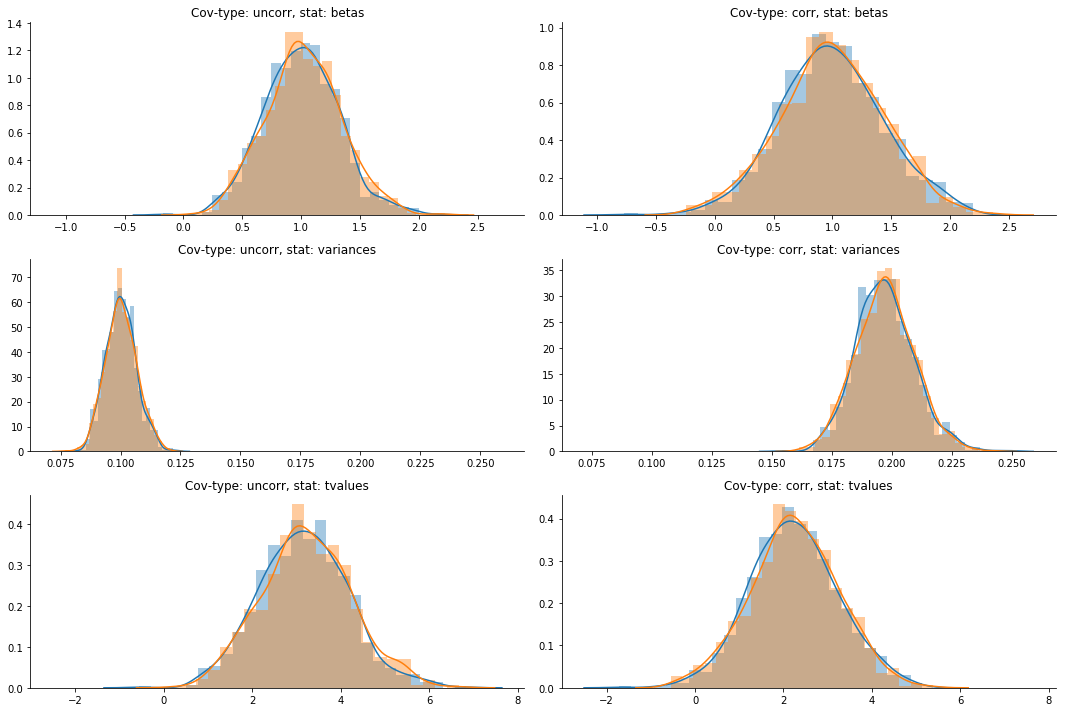

In [64]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex='row', sharey=False, figsize=(15, 10))

for i, covtype in enumerate(['uncorr', 'corr']):
    
    for ii, stat in enumerate(['betas', 'variances', 'tvalues']):
        
        axes[ii, i].set_title("Cov-type: %s, stat: %s" % (covtype, stat))
        sns.distplot(results[covtype][stat][:, 0], ax=axes[ii, i])
        sns.distplot(results[covtype][stat][:, 1], ax=axes[ii, i])        

sns.despine()
fig.tight_layout()